# IMPORTING LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

In [2]:
import plotly.express as px

from jupyterthemes import jtplot

jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)

In [3]:
cancer_df = pd.read_csv("data/cervical_cancer.csv")

In [4]:
cancer_df.head(10)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,...,?,?,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,...,?,?,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,1,0,1,1,0,0,0,0
9,44,3.0,15.0,?,1.0,1.266972909,2.8,0.0,0.0,?,...,?,?,0,0,0,0,0,0,0,0


In [5]:
cancer_df.tail(20)


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
838,35,3.0,18.0,3.0,0.0,0.0,0.0,1.0,5.0,0.0,...,?,?,0,0,0,0,0,0,0,0
839,31,3.0,19.0,1.0,0.0,0.0,0.0,1.0,0.08,1.0,...,?,?,1,0,0,1,0,0,0,0
840,24,2.0,16.0,3.0,0.0,0.0,0.0,1.0,5.0,0.0,...,?,?,0,0,0,0,0,0,0,0
841,23,2.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
842,36,3.0,16.0,3.0,1.0,6.0,0.3,1.0,2.0,0.0,...,?,?,0,0,0,0,0,0,0,0
843,30,3.0,14.0,3.0,0.0,0.0,0.0,1.0,2.0,0.0,...,?,?,0,0,0,0,0,0,0,0
844,26,8.0,15.0,1.0,1.0,9.0,1.35,1.0,5.0,1.0,...,?,?,0,0,0,0,0,0,0,0
845,19,2.0,15.0,2.0,0.0,0.0,0.0,1.0,0.75,0.0,...,?,?,0,0,0,0,0,0,0,0
846,35,2.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
847,30,3.0,22.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0


# EXPLORATORY DATA ANALYSIS

In [6]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [7]:
# REPLACING '?' WITH NaN

cancer_df = cancer_df.replace("?",np.nan)


In [8]:
cancer_df.tail(10)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
848,31,3.0,18.0,1.0,0.0,0.0,0.0,1.0,0.5,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
849,32,3.0,18.0,1.0,1.0,11.0,0.16,1.0,6.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
850,19,1.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
851,23,2.0,15.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
852,43,3.0,17.0,3.0,0.0,0.0,0.0,1.0,5.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
857,29,2.0,20.0,1.0,0.0,0.0,0.0,1.0,0.5,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


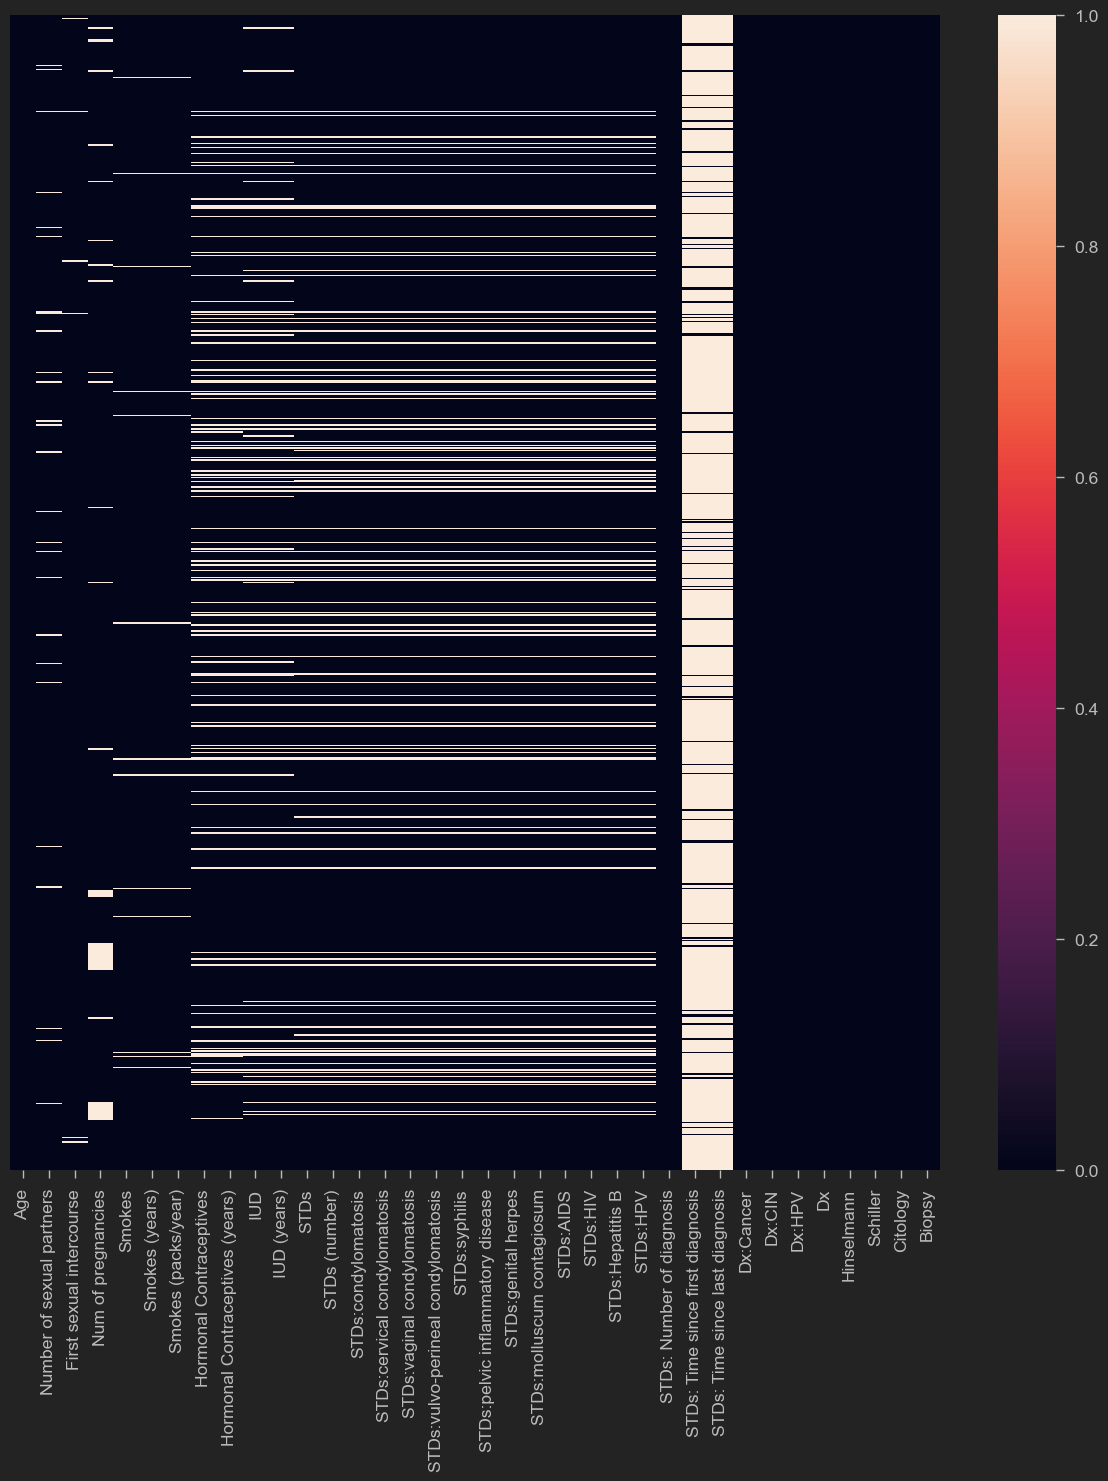

In [9]:
# PLOTTING HEATMAP TO VISUALIZE THE NUMBER OF NaN'S IN TH DATA
plt.figure(figsize=(15,15))
sns.heatmap(cancer_df.isnull(),yticklabels= False)
plt.show()

In [10]:
cancer_df = cancer_df.drop(['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'],axis=1)
cancer_df                           

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [11]:
# Converting the column data types, from object to numeric
cancer_df = cancer_df.apply(pd.to_numeric)
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [12]:
cancer_df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,845.000000,750.000000,750.000000,741.000000,...,753.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,...,0.002656,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.667760,2.803355,1.447414,0.352876,4.089017,2.226610,0.479929,3.764254,0.315593,...,0.051503,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
cancer_df.mean()

Age                                   26.820513
Number of sexual partners              2.527644
First sexual intercourse              16.995300
Num of pregnancies                     2.275561
Smokes                                 0.145562
Smokes (years)                         1.219721
Smokes (packs/year)                    0.453144
Hormonal Contraceptives                0.641333
Hormonal Contraceptives (years)        2.256419
IUD                                    0.112011
IUD (years)                            0.514804
STDs                                   0.104914
STDs (number)                          0.176627
STDs:condylomatosis                    0.058433
STDs:cervical condylomatosis           0.000000
STDs:vaginal condylomatosis            0.005312
STDs:vulvo-perineal condylomatosis     0.057105
STDs:syphilis                          0.023904
STDs:pelvic inflammatory disease       0.001328
STDs:genital herpes                    0.001328
STDs:molluscum contagiosum             0

In [14]:
# REPLACING NULL/NaN values with the mean values:
cancer_df = cancer_df.fillna(cancer_df.mean())
cancer_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0000,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0000,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,16.9953,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0000,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0000,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.0000,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.0000,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.0000,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0


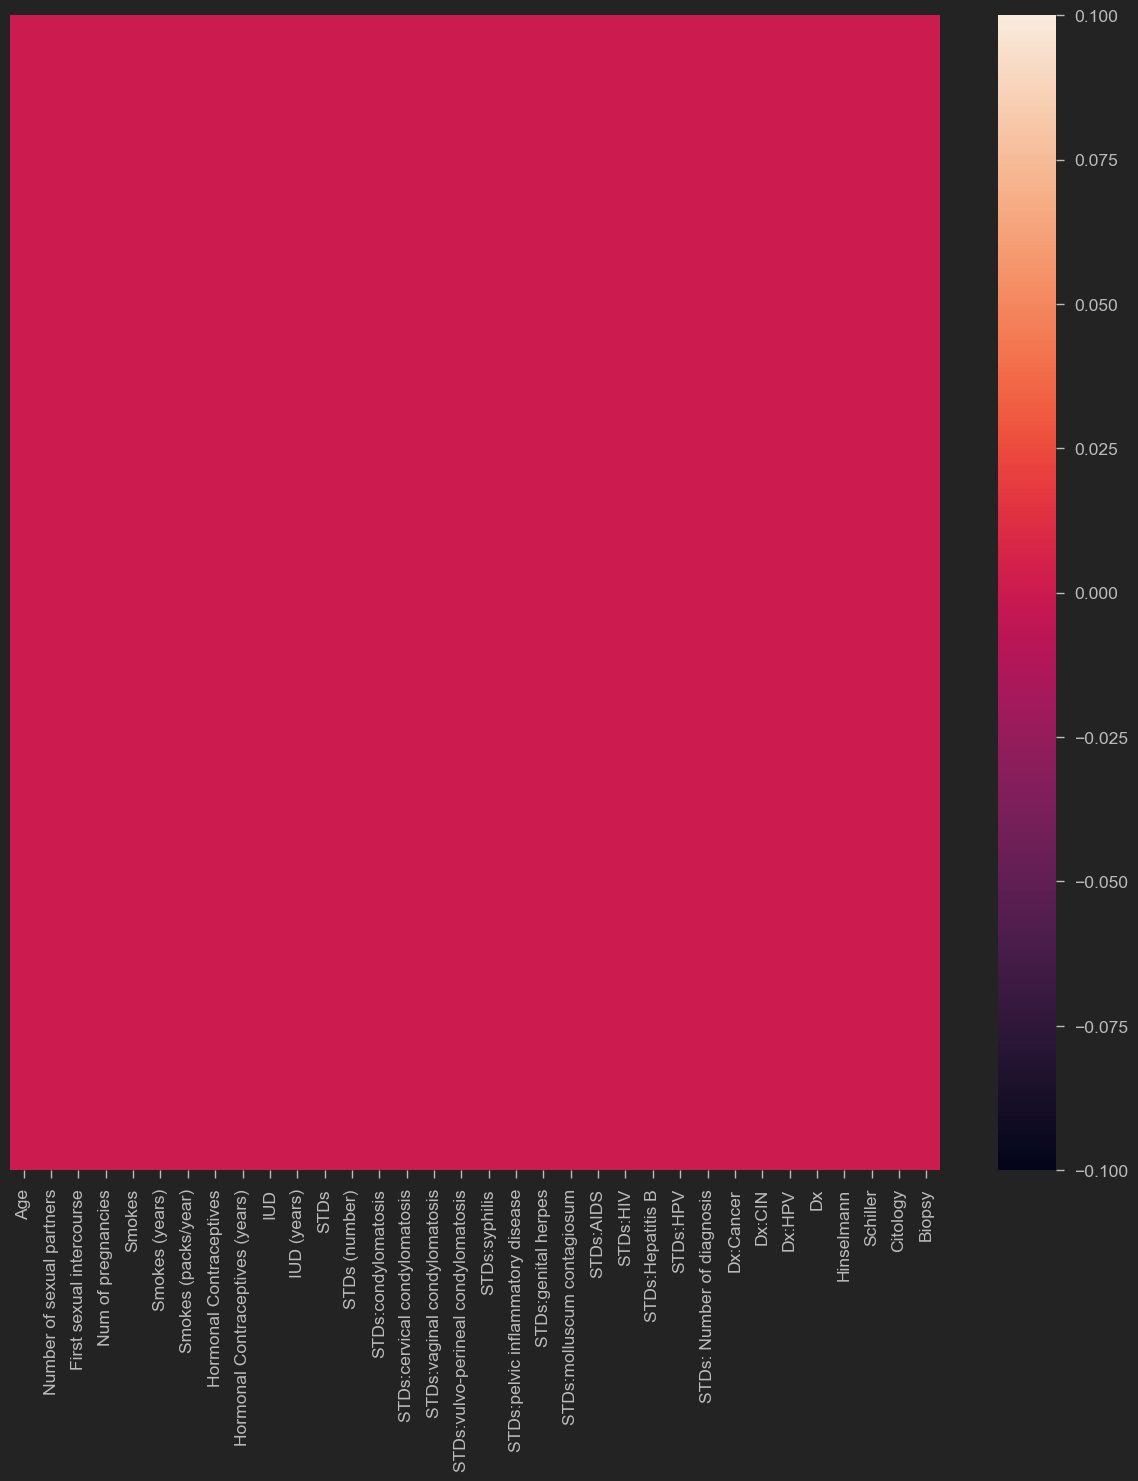

In [15]:
# PLOTTING HEATMAP AGAIN TO VISUALIZE AND CHECK OUR DATA CLEANSING
plt.figure(figsize=(15,15))
sns.heatmap(cancer_df.isnull(),yticklabels= False)
plt.show()

In [16]:
corr_matrix = cancer_df.corr()
corr_matrix

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,0.084896,0.369168,0.526137,0.055813,0.217349,0.131180,0.065624,0.277181,0.267662,...,0.038546,-0.001606,0.110340,0.061443,0.101722,0.092635,-0.003967,0.103283,-0.016862,0.055956
Number of sexual partners,0.084896,1.000000,-0.147937,0.076719,0.238078,0.177117,0.175153,0.006342,0.018552,0.030005,...,0.013871,0.051559,0.022309,0.015691,0.027264,0.022982,-0.039273,-0.008899,0.021839,-0.001429
First sexual intercourse,0.369168,-0.147937,1.000000,-0.058223,-0.123602,-0.058366,-0.056332,0.018344,0.008000,-0.020975,...,0.033112,-0.013327,0.067283,-0.032626,0.043966,0.035750,-0.016546,0.003493,-0.010971,0.007262
Num of pregnancies,0.526137,0.076719,-0.058223,1.000000,0.080768,0.174912,0.097044,0.142858,0.207839,0.198550,...,-0.028162,0.033514,0.035123,0.007344,0.046753,0.019025,0.038685,0.087687,-0.029656,0.043460
Smokes,0.055813,0.238078,-0.123602,0.080768,1.000000,0.723128,0.493361,-0.002165,0.044157,-0.051184,...,0.049171,0.095433,-0.011027,-0.042822,0.012210,-0.067614,0.034527,0.053613,-0.003913,0.029091
Smokes (years),0.217349,0.177117,-0.058366,0.174912,0.723128,1.000000,0.724116,-0.011002,0.048899,0.027562,...,0.050935,0.081676,0.054674,-0.030966,0.057214,-0.048894,0.071232,0.094640,-0.006750,0.061484
Smokes (packs/year),0.131180,0.175153,-0.056332,0.097044,0.493361,0.724116,1.000000,0.005880,0.040112,0.007891,...,-0.008410,0.032186,0.108476,-0.021127,0.110366,-0.033358,0.026662,0.017954,0.004613,0.024657
Hormonal Contraceptives,0.065624,0.006342,0.018344,0.142858,-0.002165,-0.011002,0.005880,1.000000,0.448574,0.033729,...,0.039040,-0.050660,0.026407,-0.003334,0.038038,-0.001723,0.033551,-0.004247,-0.011030,0.007711
Hormonal Contraceptives (years),0.277181,0.018552,0.008000,0.207839,0.044157,0.048899,0.040112,0.448574,1.000000,0.094953,...,0.052059,-0.037219,0.054627,0.003086,0.061394,-0.012865,0.038825,0.078707,0.074324,0.078995
IUD,0.267662,0.030005,-0.020975,0.198550,-0.051184,0.027562,0.007891,0.033729,0.094953,1.000000,...,-0.018574,0.029871,0.110541,0.051833,0.058154,0.138905,0.044059,0.084074,0.007348,0.051554


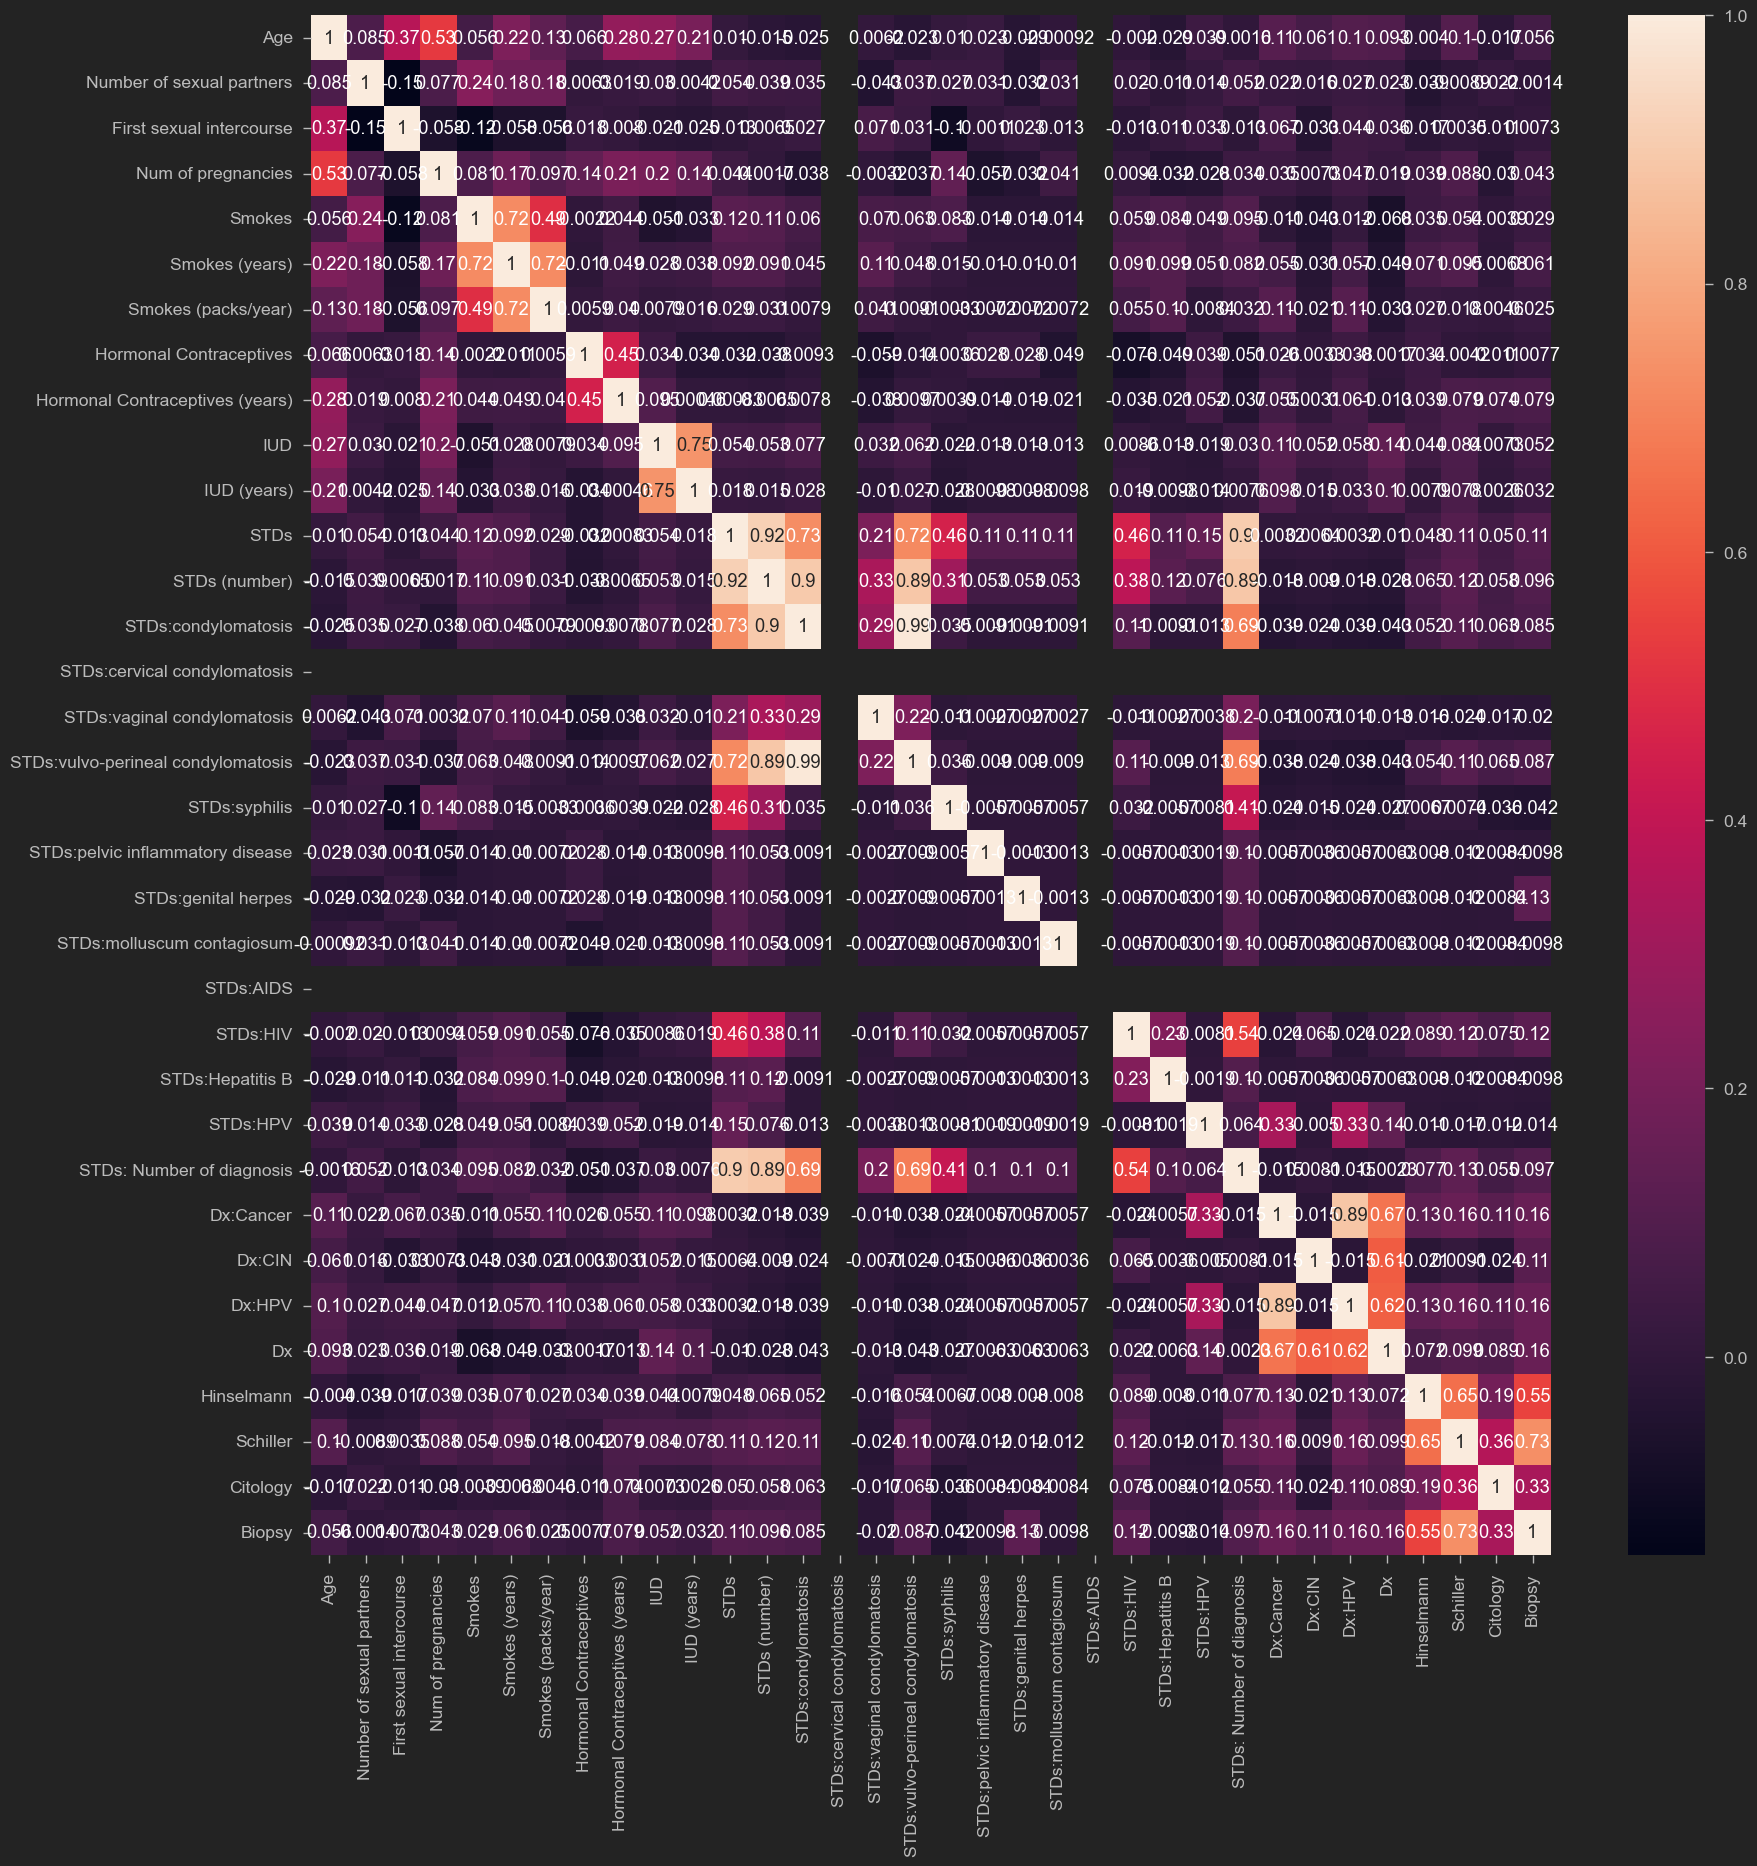

In [17]:
# PLOTTING THE HEATMAP FOR CORRELATION MATRIX

plt.figure(figsize = (20,20))
sns.heatmap(corr_matrix, annot=True)
plt.show()

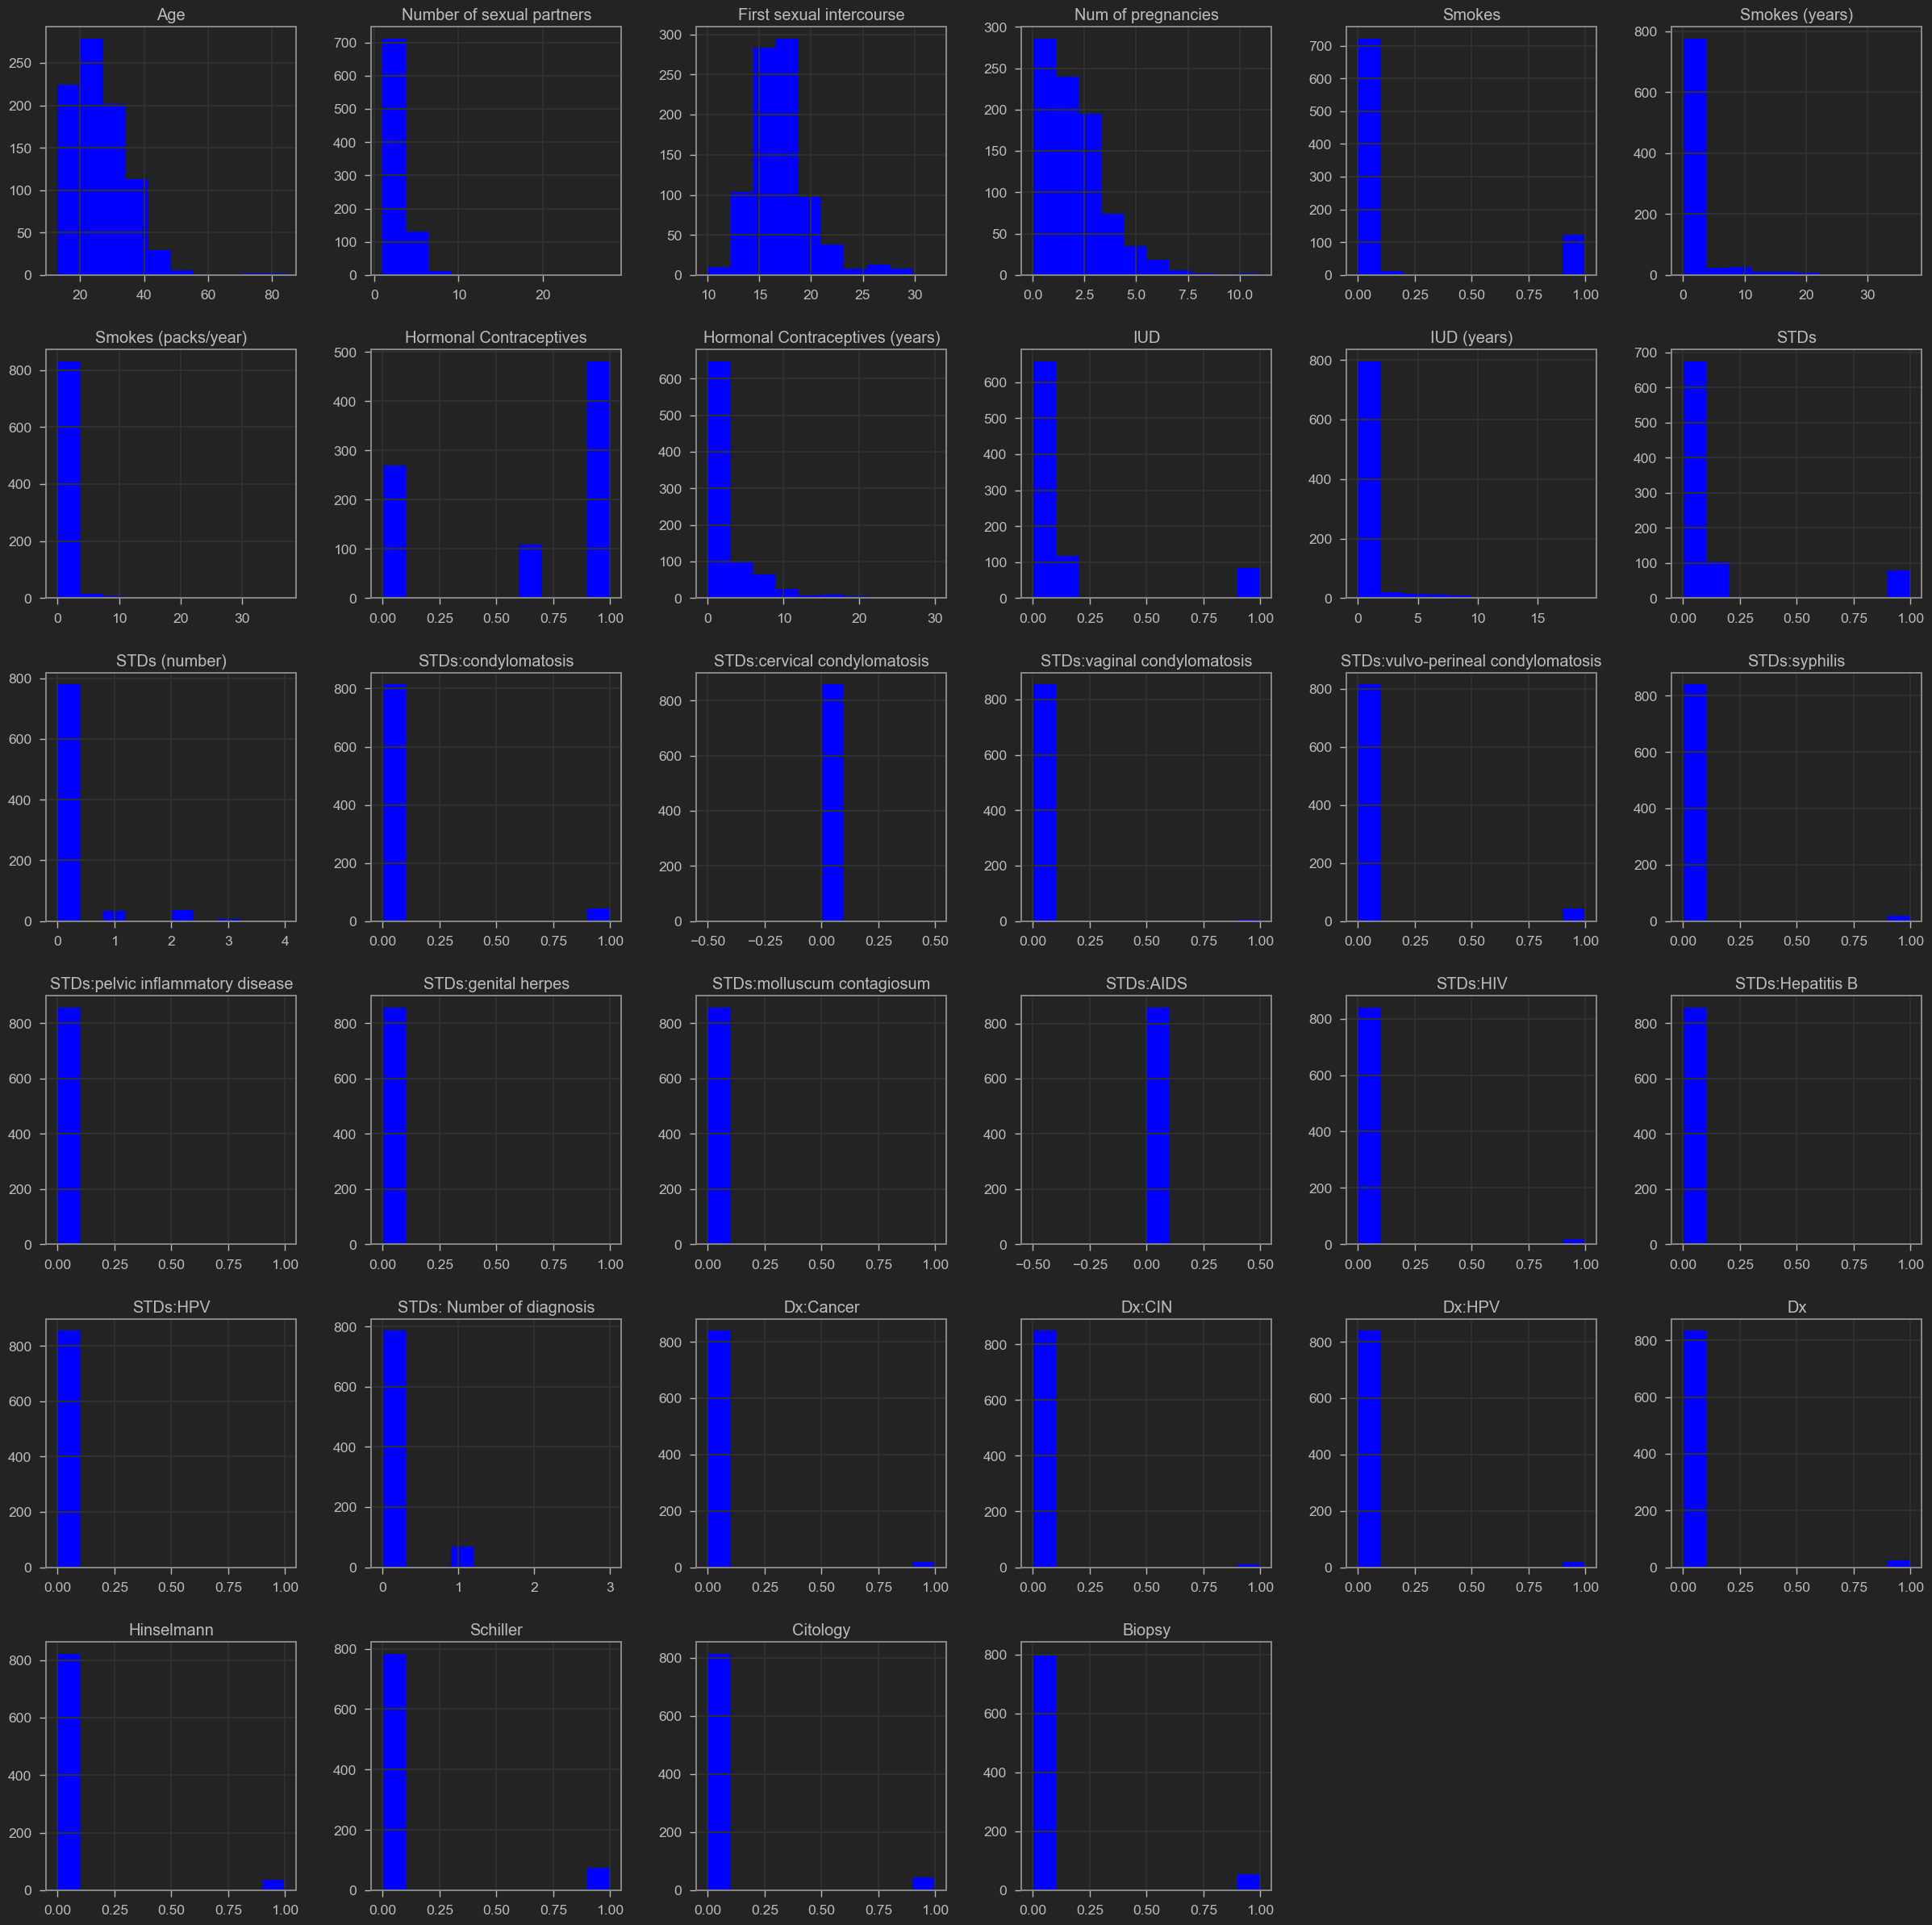

In [18]:
# VISUALIZING THE WHOLE DATAFRAME BY PLOTTING HISTOGRAM
cancer_df.hist(bins = 10, figsize = (30,30), color='blue')
plt.show()

# PREPARING DATA BEFORE TRAINING

In [19]:
target = cancer_df["Biopsy"]
inputs = cancer_df.drop("Biopsy",axis=1)

In [20]:
X = np.array(inputs).astype('float32')
y = np.array(target).astype('float32')

y = y.reshape(-1,1)

In [21]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [22]:
X

array([[-1.0385634e+00,  8.9706147e-01, -7.1509570e-01, ...,
        -2.0622157e-01, -3.0722591e-01, -2.3249528e-01],
       [-1.3917956e+00, -9.3074709e-01, -1.0734857e+00, ...,
        -2.0622157e-01, -3.0722591e-01, -2.3249528e-01],
       [ 8.4534228e-01, -9.3074709e-01,  2.2945171e-07, ...,
        -2.0622157e-01, -3.0722591e-01, -2.3249528e-01],
       ...,
       [-2.1435463e-01, -3.2147753e-01,  1.6845580e-03, ...,
        -2.0622157e-01, -3.0722591e-01,  4.3011627e+00],
       [ 7.2759819e-01, -3.2147753e-01,  2.5104153e+00, ...,
        -2.0622157e-01, -3.0722591e-01, -2.3249528e-01],
       [ 2.5662178e-01, -3.2147753e-01,  1.0768549e+00, ...,
        -2.0622157e-01, -3.0722591e-01, -2.3249528e-01]],
      shape=(858, 33), dtype=float32)

In [23]:
# SPLITTING DATA INTO TRAIN AND TEST DATASETS
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)

# TRAINING AND EVALUATING XGBOOST CLASSIFIER

In [25]:
import xgboost as xgb
model = xgb.XGBClassifier(learning_rate=0.1,max_depth=50,n_estimators=100)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=50,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

# TESTING OUT RESULTS OF OUR MODEL

In [26]:
result_train = model.score(X_train,y_train)
result_train

0.9956268221574344

In [27]:
result_test = model.score(X_test,y_test)
result_test

0.9651162790697675

In [28]:
y_predict = model.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98        79
         1.0       0.83      0.71      0.77         7

    accuracy                           0.97        86
   macro avg       0.90      0.85      0.88        86
weighted avg       0.96      0.97      0.96        86



# PLOTTING A CONFUSION MATRIX

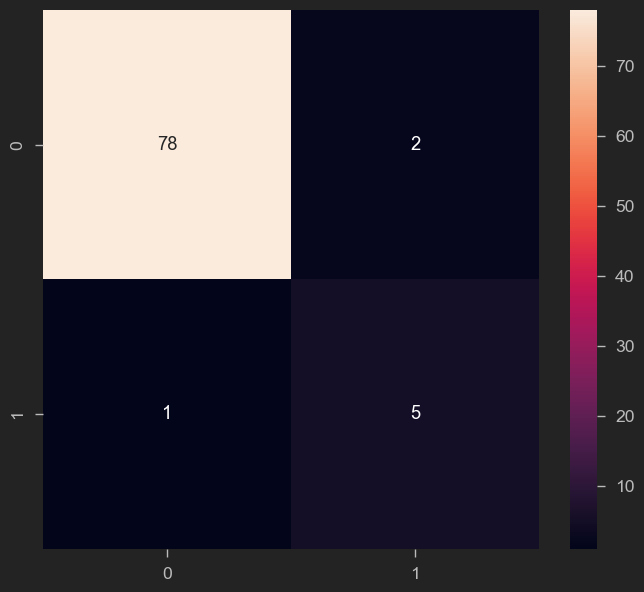

In [30]:
cm = confusion_matrix(y_predict, y_test)

sns.heatmap(cm, annot = True)

plt.show()

In [31]:
# Memeriksa distribusi kelas pada kolom target Dx:Cancer
class_distribution = pd.Series(y.flatten()).value_counts()
class_distribution

0.0    803
1.0     55
Name: count, dtype: int64

Kelas 0 (tidak terdiagnosis kanker serviks): 840 sampel

Kelas 1 (terdiagnosis kanker serviks): 18 sampel

# Dataset lama dengan target kolom Dx:Cancer

In [32]:
import pickle

inputs.replace('?', pd.NA, inplace=True)

# Mengimputasi nilai yang hilang dengan mean untuk kolom numerik
inputs = inputs.apply(pd.to_numeric, errors='ignore')  # Mengonversi kolom numerik ke tipe data yang sesuai
inputs.fillna(inputs.mean(), inplace=True)  # Mengimputasi nilai numerik yang hilang dengan rata-rata

TARGET = 'Dx:Cancer'
feature_cols = [c for c in inputs.columns if c != TARGET]

# Simpan daftar feature_cols untuk testing nanti
with open('feature_cols.pkl','wb') as f_feat:
    pickle.dump(feature_cols, f_feat)
    
# Menyiapkan data untuk model: fitur dan target
X = inputs[feature_cols].values.astype('float32')
y = inputs[TARGET].values.astype('int') # Target

# Membagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

# Melatih model XGBoost
model = xgb.XGBClassifier(learning_rate=0.1, max_depth=50, n_estimators=100)
model.fit(X_train, y_train)

# Menampilkan akurasi pada data latih dan uji
result_train = model.score(X_train, y_train)
result_test = model.score(X_test, y_test)

(result_train, result_test)  # Menampilkan akurasi latih dan uji

C:\Users\aavnx\AppData\Local\Temp\ipykernel_12500\565588128.py:6: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  inputs = inputs.apply(pd.to_numeric, errors='ignore')  # Mengonversi kolom numerik ke tipe data yang sesuai


(0.9985422740524781, 0.9883720930232558)

In [33]:
# Melakukan prediksi pada data uji (X_test)
y_predict = model.predict(X_test)

# Menampilkan hasil prediksi pada data uji
predictions_df = pd.DataFrame(X_test, columns=feature_cols)

# Tambahkan kolom prediksi
predictions_df['Prediksi Risiko Kanker Serviks'] = y_predict

# Tampilkan beberapa baris
display(predictions_df.head())

# Tampilkan contoh pasien yang diprediksi positif
display(predictions_df[predictions_df['Prediksi Risiko Kanker Serviks'] == 1].head(1))

# Menampilkan beberapa hasil prediksi
import matplotlib.pyplot as plt

# Menampilkan beberapa prediksi pertama
predictions_df.head()


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Prediksi Risiko Kanker Serviks
0,-1.305347,-0.905784,-0.348727,-0.932934,-0.403350,-0.285068,-0.191104,-1.444031,-0.648198,-0.366675,...,-0.388596,-0.047345,-0.290507,-0.101535,-0.138984,-0.159408,-0.202413,-0.301032,-0.245516,0
1,-0.448674,0.262051,0.011030,-0.207421,-0.403350,-0.285068,-0.191104,-1.444031,-0.648198,-0.366675,...,-0.388596,-0.047345,-0.290507,-0.101535,-0.138984,-0.159408,-0.202413,-0.301032,-0.245516,0
2,0.775145,-0.905784,-0.348727,1.243604,-0.403350,-0.285068,-0.191104,-1.444031,-0.648198,-0.366675,...,-0.388596,-0.047345,-0.290507,-0.101535,-0.138984,-0.159408,-0.202413,-0.301032,-0.245516,0
3,0.040853,0.845969,-0.348727,-0.932934,-0.403350,-0.285068,-0.191104,0.794942,-0.456028,-0.366675,...,-0.388596,-0.047345,-0.290507,-0.101535,-0.138984,-0.159408,-0.202413,-0.301032,-0.245516,0
4,-1.060584,0.262051,-0.708484,-0.932934,2.521538,0.212016,-0.189707,0.794942,-0.481841,-0.366675,...,-0.388596,-0.047345,-0.290507,-0.101535,-0.138984,-0.159408,-0.202413,-0.301032,-0.245516,0


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Prediksi Risiko Kanker Serviks
9,1.142291,0.262051,1.090302,-0.207421,-0.40335,-0.285068,-0.191104,0.794942,1.072729,-0.366675,...,-0.388596,26.165276,2.923815,-0.101535,7.195084,6.273192,-0.202413,-0.301032,-0.245516,1


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Prediksi Risiko Kanker Serviks
0,-1.305347,-0.905784,-0.348727,-0.932934,-0.403350,-0.285068,-0.191104,-1.444031,-0.648198,-0.366675,...,-0.388596,-0.047345,-0.290507,-0.101535,-0.138984,-0.159408,-0.202413,-0.301032,-0.245516,0
1,-0.448674,0.262051,0.011030,-0.207421,-0.403350,-0.285068,-0.191104,-1.444031,-0.648198,-0.366675,...,-0.388596,-0.047345,-0.290507,-0.101535,-0.138984,-0.159408,-0.202413,-0.301032,-0.245516,0
2,0.775145,-0.905784,-0.348727,1.243604,-0.403350,-0.285068,-0.191104,-1.444031,-0.648198,-0.366675,...,-0.388596,-0.047345,-0.290507,-0.101535,-0.138984,-0.159408,-0.202413,-0.301032,-0.245516,0
3,0.040853,0.845969,-0.348727,-0.932934,-0.403350,-0.285068,-0.191104,0.794942,-0.456028,-0.366675,...,-0.388596,-0.047345,-0.290507,-0.101535,-0.138984,-0.159408,-0.202413,-0.301032,-0.245516,0
4,-1.060584,0.262051,-0.708484,-0.932934,2.521538,0.212016,-0.189707,0.794942,-0.481841,-0.366675,...,-0.388596,-0.047345,-0.290507,-0.101535,-0.138984,-0.159408,-0.202413,-0.301032,-0.245516,0


In [34]:
# Menampilkan satu orang yang terindikasi kanker serviks (Prediksi == 1)
cancer_predictions = predictions_df[predictions_df['Prediksi Risiko Kanker Serviks'] == 1]

# Menampilkan data prediksi pertama yang terindikasi terkena kanker serviks
cancer_predictions.head(1)


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Prediksi Risiko Kanker Serviks
9,1.142291,0.262051,1.090302,-0.207421,-0.40335,-0.285068,-0.191104,0.794942,1.072729,-0.366675,...,-0.388596,26.165276,2.923815,-0.101535,7.195084,6.273192,-0.202413,-0.301032,-0.245516,1


# Classification dan Confussion Matrix Dataset Lama untuk Test Model

=== Classification Report: Original Data ===
              precision    recall  f1-score   support

           0     0.9940    0.9940    0.9940       167
           1     0.8000    0.8000    0.8000         5

    accuracy                         0.9884       172
   macro avg     0.8970    0.8970    0.8970       172
weighted avg     0.9884    0.9884    0.9884       172



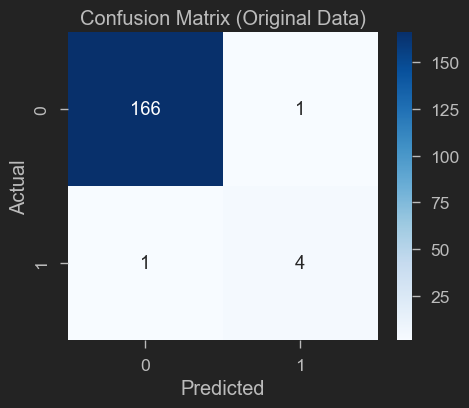

In [35]:
print("=== Classification Report: Original Data ===")
print(classification_report(y_test, y_predict, digits=4))

# 2. Buat dan plot Confusion Matrix
cm_old = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(5,4))
sns.heatmap(cm_old, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Original Data)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# Dataset Baru dengan target kolom Dx:Cancer

In [36]:
with open('xgb_dx_cancer_model.pkl','wb') as f_model:
    pickle.dump(model, f_model)

with open('scaler_dx_cancer.pkl','wb') as f_scaler:
    pickle.dump(scaler, f_scaler)

In [37]:
# Load synthetic & preprocess
df_new = pd.read_csv("data/synthetic_full_header_cervical_cancer.csv", na_values='?')
df_new.drop(
    ['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'],
    axis=1, inplace=True, errors='ignore'
)
df_new = df_new.apply(pd.to_numeric, errors='coerce')
df_new.fillna(df_new.median(), inplace=True)

# Load saved artifacts
model        = pickle.load(open('xgb_dx_cancer_model.pkl','rb'))
scaler       = pickle.load(open('scaler_dx_cancer.pkl','rb'))
feature_cols = pickle.load(open('feature_cols.pkl','rb'))

# Siapkan X_new & y_new menggunakan feature_cols
X_new = df_new[feature_cols].values.astype('float32')
y_new = df_new[TARGET].values.astype('int')

# Scale & predict
X_new_scaled = scaler.transform(X_new)
y_pred_new   = model.predict(X_new_scaled)



# Evaluasi Classification Report dan Confusion Matriks Data Baru pada Model

=== Synthetic Data Report ===
              precision    recall  f1-score   support

           0       0.98      0.60      0.75      1957
           1       0.02      0.37      0.04        43

    accuracy                           0.60      2000
   macro avg       0.50      0.49      0.39      2000
weighted avg       0.96      0.60      0.73      2000



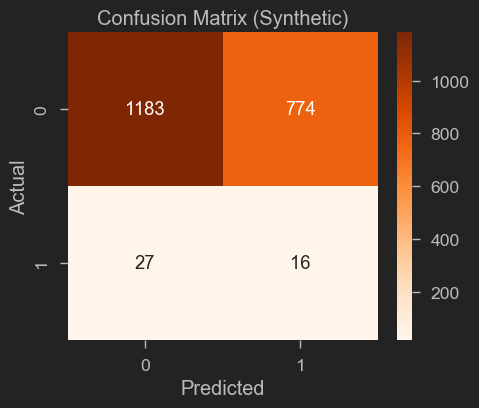

In [38]:
print("=== Synthetic Data Report ===")
print(classification_report(y_new, y_pred_new))

cm_new = confusion_matrix(y_new, y_pred_new)
plt.figure(figsize=(5,4))
sns.heatmap(cm_new, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix (Synthetic)")
plt.ylabel("Actual"); plt.xlabel("Predicted")
plt.show()